In [ ]:
import math
import matplotlib.pyplot as plt
import numpy as np

def f(z,n):
  if n==1:
    return z ** 2 
  if n==2:
    return (z-1) ** 2
  if n==3:
    return z ** 2 -1
  if n==4:
    return z ** 2 +1  

def df(z,n):
  if n==1:
    return 2*z 
  if n==2:
    return 2*(z -1)
  if n==3:
    return 2*z 
  if n==4:
    return 2*z 

def raices_clasico(a=0,b=0,c=0):
  raiz= b**2 - 4*a*c
  if raiz>=0:
    if raiz==0:
      return (-b/(2*a),None)
    else:
      return ((-b+math.sqrt(raiz))/2*a,(-b-math.sqrt(raiz))/2*a)
  else:
    raiz=abs(raiz)
    r1=complex(-b/2*a,math.sqrt(raiz)/(2*a))
    r2=complex(-b/2*a,-1*math.sqrt(raiz)/(2*a))
    return (r1,r2)

def raices_psl(b=0,c=0):
  centro=-b/2
  if centro-c==0:
    return (centro, None)
  elif centro-c>0:
    u=math.sqrt(centro-c)
    return (centro+u,centro-u)
  else:
    inter=abs(centro-c)
    r1=complex(centro,math.sqrt(inter))
    r2=complex(centro,-1*math.sqrt(inter))
    return (r1,r2)

def calcular_clasico(n):
  if n==1:
    raices=raices_clasico(a=1)
    for i in range(2):
      if raices[i]!=None:
        print (f"La raiz {i+1}  es :   {raices[i]}")
  if n==2:
    raices=raices_clasico(a=1, b=-2,c=1)
    for i in range(2):
      if raices[i]!=None:
        print (f"La raiz {i+1}  es :   {raices[i]}")
  if n==3:
    raices=raices_clasico(a=1, c=-1)
    for i in range(2):
      if raices[i]!=None:
        print (f"La raiz {i+1}  es :   {raices[i]}")
  if n==4:
    raices=raices_clasico(a=1, c=1)
    for i in range(2):
      if raices[i]!=None:
        print (f"La raiz {i+1}  es :   {raices[i]}")

def calcular_psl(n):
  if n==1:
    raices=raices_psl()
    for i in range(2):
      if raices[i]!=None:
        print (f"La raiz {i+1}  es :   {raices[i]}")
  if n==2:
    raices=raices_psl(b=-2,c=1)
    for i in range(2):
      if raices[i]!=None:
        print (f"La raiz {i+1}  es :   {raices[i]}")
  if n==3:
    raices=raices_psl(c=-1)
    for i in range(2):
      if raices[i]!=None:
        print (f"La raiz {i+1}  es :   {raices[i]}")
  if n==4:
    raices=raices_psl(c=1)
    for i in range(2):
      if raices[i]!=None:
        print (f"La raiz {i+1}  es :   {raices[i]}")

def newton_set1(z_c_r=0, z_c_i=0, zh = 5, zw=5, width=500, height=500, zoom=1,  niter=256, n=1):
    """ Fractals using newton-raphson """

    # Pixels array
    pixels = np.arange(width*height*3, dtype=np.uint32).reshape(height, width, 3)

    h = 1e-7 # step size for numerical derivative
    eps = 1e-3 # max error allowed

    # Bounding roots
    if n==1:
      raices= raices_psl()
    if n==2:
      raices=raices_psl(b=-2,c=1)
    if n==3:
      raices=raices_psl(c=-1)
    if n==4:
      raices=raices_psl(c=1)
    
    # Color multiplication factor
    # NOTE: Increasing this darkens the image and lightens it otherwise
    multcol = 5

    for y in range(height):
            zy =   z_c_i+(((y-(height/2))/height)*zh*zoom)

            for x in range(width):
                zx = z_c_r+ (((x-(width/2))/width)*zw*zoom)

                # Mapping real -> complex plane
                z = complex(zx, zy)
                
                count = 0
                
                for i in range(niter):
                    # complex numerical derivative
                    dz = df(z,n)
                    if dz == 0:
                        break

                    count += 1
                    if count > 255:
                        break
                   
                    znext = z - f(z,n) / dz # Newton iteration

                    if abs(znext - z) < eps: # stop when close enough to any root
                        break
                    
                    z = znext

                # Pixels colored using the roots
                if raices[1]!=None:
                  if abs(z-raices[0])<eps:
                      # color red
                      pixels[height-y-1,x] = (255 - count*multcol, 0, 0)
                  elif abs(z-raices[1])<=eps:
                      # color green
                      pixels[height-y-1,x] = (0, 255 - count*multcol, 0)
                  else:   
                    pixels[height-y-1,x] = (0, 0, 0)
                else:
                  if abs(z-raices[0])<eps:
                      # color red
                      pixels[height-y-1,x] = (255 - count*multcol, 0, 0)
                  else:   
                    pixels[height-y-1,x] = (0, 0, 0)

               
    return pixels

def display1(z_c_r=0, z_c_i=0, zh = 1, zw=1, width=500, height=500, zoom=1,  niter=256,n=1):
    """ Display a newton-raphson fractal """
    print("Z region from (",z_c_r+ (((0-(width/2))/width)*zw*zoom),",",z_c_i+(((0-(height/2))/height)*zh*zoom) ,") to (",z_c_r+ (((width-(width/2))/width)*zw*zoom),",",z_c_i+(((height-(height/2))/height)*zh*zoom),")")
    pimg = newton_set1(z_c_r=z_c_r, z_c_i=z_c_i, zh = zh, zw=zw, width=width, height=width, zoom=zoom,  niter=niter,n=n)
    if n==1:
      plt.title("Fractal de Newton f(x)= x^2")
    if n==2:
      plt.title("Fractal de Newton f(x)= (x-1)^2")
    if n==3:
      plt.title("Fractal de Newton f(x)= x^2 -1")
    if n==4:
      plt.title("Fractal de Newton f(x)= x^2 + 1")
    plt.xlabel("real"+"("+ str(z_c_r+ (((0-(width/2))/width)*zw*zoom))+","+str(z_c_r+ (((width-(width/2))/width)*zw*zoom))+")")
    plt.ylabel("imaginary"+"("+str(z_c_i+(((0-(height/2))/height)*zh*zoom))+","+str(z_c_i+(((height-(height/2))/height)*zh*zoom)) +")")
    plt.imshow(pimg)
    plt.show()

def graficar(a,b,n):
  z=complex(a,b)
  r=[]
  i=[]
  for k in range(50):
    dz = df(z,n)
    z = z - f(z,n) / dz # Newton iteration
    r.append(np.real(z))
    i.append(np.imag(z))
  plt.title(f'Newton iterates form z={a} + {b}j')
  plt.plot(r)
  plt.ylabel('Real part')
  plt.show()
  plt.plot(i)
  plt.ylabel('Imagnary part')
  plt.show()

PRIMER PUNTO


Grafica de x^2

Text(0, 0.5, 'f(x)')

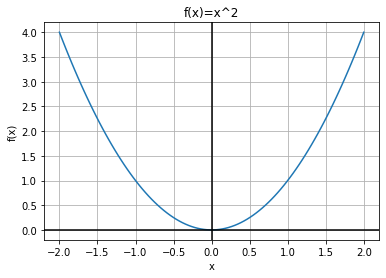

In [ ]:
x = np.linspace(-2.0,2.0,100)
fig, ax = plt.subplots()
ax.plot(x,f(x,1))
ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k')
ax.grid(True, which='both')
plt.title('f(x)=x^2')
plt.xlabel('x')
plt.ylabel('f(x)')

Grafica de (x-1)^2

Text(0, 0.5, 'f(x)')

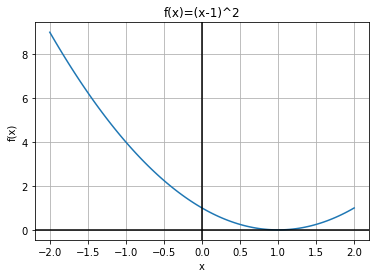

In [ ]:
x = np.linspace(-2.0,2.0,100)
fig, ax = plt.subplots()
ax.plot(x,f(x,2))
ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k')
ax.grid(True, which='both')
plt.title('f(x)=(x-1)^2')
plt.xlabel('x')
plt.ylabel('f(x)')

Grafica de x^2 - 1

Text(0, 0.5, 'f(x)')

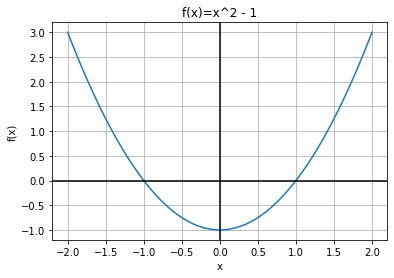

In [ ]:
x = np.linspace(-2.0,2.0,100)
fig, ax = plt.subplots()
ax.plot(x,f(x,3))
ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k')
ax.grid(True, which='both')
plt.title('f(x)=x^2 - 1')
plt.xlabel('x')
plt.ylabel('f(x)')

Grafica de x^2 + 1

Text(0, 0.5, 'f(x)')

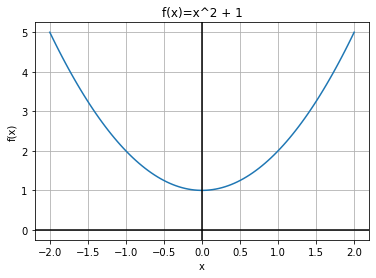

In [ ]:
x = np.linspace(-2.0,2.0,100)
fig, ax = plt.subplots()
ax.plot(x,f(x,4))
ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k')
ax.grid(True, which='both')
plt.title('f(x)=x^2 + 1')
plt.xlabel('x')
plt.ylabel('f(x)')

SEGUNDO PUNTO

Las raices de las funciones halladas con el metodo clasico son:

In [ ]:
print ("PARA LA FUNCIÓN f(x)=x^2, las raices son: ")
calcular_clasico(1)
print ("PARA LA FUNCIÓN f(x)=(x-1)^2, las raices son: ")
calcular_clasico(2)
print ("PARA LA FUNCIÓN f(x)=x^2-1, las raices son: ")
calcular_clasico(3)
print ("PARA LA FUNCIÓN f(x)=x^2+1, las raices son: ")
calcular_clasico(4)

PARA LA FUNCIÓN f(x)=x^2, las raices son: 
La raiz 1  es :   0.0
PARA LA FUNCIÓN f(x)=(x-1)^2, las raices son: 
La raiz 1  es :   1.0
PARA LA FUNCIÓN f(x)=x^2-1, las raices son: 
La raiz 1  es :   1.0
La raiz 2  es :   -1.0
PARA LA FUNCIÓN f(x)=x^2+1, las raices son: 
La raiz 1  es :   1j
La raiz 2  es :   -1j


Las raices de las funciones halladas con el metodo Po-Shen Loh son:

In [ ]:
print ("PARA LA FUNCIÓN f(x)=x^2, las raices son: ")
calcular_psl(1)
print ("PARA LA FUNCIÓN f(x)=(x-1)^2, las raices son: ")
calcular_psl(2)
print ("PARA LA FUNCIÓN f(x)=x^2-1, las raices son: ")
calcular_psl(3)
print ("PARA LA FUNCIÓN f(x)=x^2+1, las raices son: ")
calcular_psl(4)

PARA LA FUNCIÓN f(x)=x^2, las raices son: 
La raiz 1  es :   0.0
PARA LA FUNCIÓN f(x)=(x-1)^2, las raices son: 
La raiz 1  es :   1.0
PARA LA FUNCIÓN f(x)=x^2-1, las raices son: 
La raiz 1  es :   1.0
La raiz 2  es :   -1.0
PARA LA FUNCIÓN f(x)=x^2+1, las raices son: 
La raiz 1  es :   1j
La raiz 2  es :   -1j


PUNTO TRES

Fractal de Newton para f(x)= x^2 

zoom out
Z region from ( -0.5 , -0.5 ) to ( 0.5 , 0.5 )


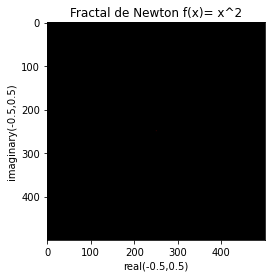

Z region from ( -1.0 , -1.0 ) to ( 1.0 , 1.0 )


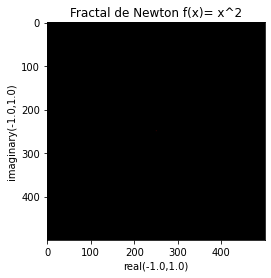

Z region from ( -1.5 , -1.5 ) to ( 1.5 , 1.5 )


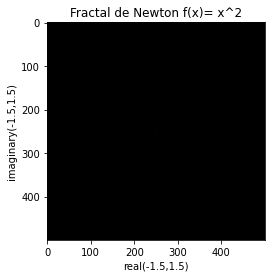

Z region from ( -2.0 , -2.0 ) to ( 2.0 , 2.0 )


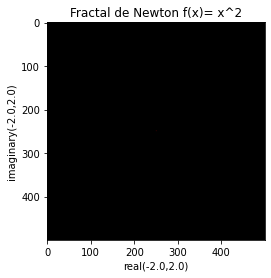

Z region from ( -2.5 , -2.5 ) to ( 2.5 , 2.5 )


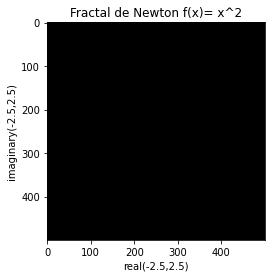

In [ ]:
print("zoom out")
display1(zoom=1,n=1)
display1(zoom=2,n=1)
display1(zoom=3,n=1)
display1(zoom=4,n=1)
display1(zoom=5,n=1)


Fractal de Newton para f(x)= (x-1)^2

zoom out
Z region from ( -0.5 , -0.5 ) to ( 0.5 , 0.5 )


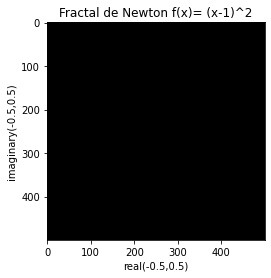

Z region from ( -1.0 , -1.0 ) to ( 1.0 , 1.0 )


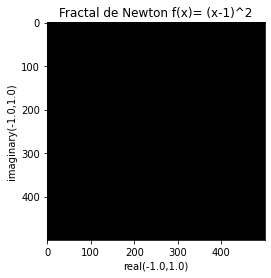

Z region from ( -1.5 , -1.5 ) to ( 1.5 , 1.5 )


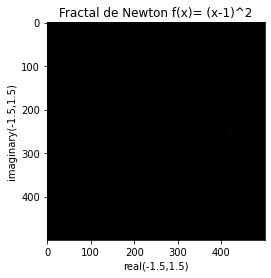

Z region from ( -2.0 , -2.0 ) to ( 2.0 , 2.0 )


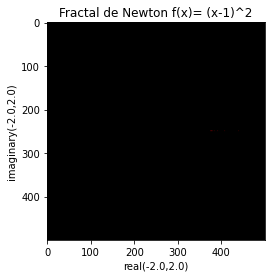

Z region from ( -2.5 , -2.5 ) to ( 2.5 , 2.5 )


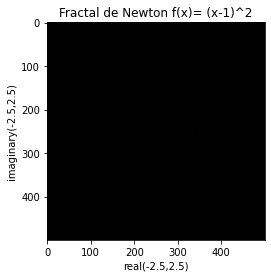

In [ ]:
print("zoom out")
display1(zoom=1,n=2)
display1(zoom=2,n=2)
display1(zoom=3,n=2)
display1(zoom=4,n=2)
display1(zoom=5,n=2)


Fractal de Newton para f(x)= x^2 - 1

zoom out
Z region from ( -0.5 , -0.5 ) to ( 0.5 , 0.5 )


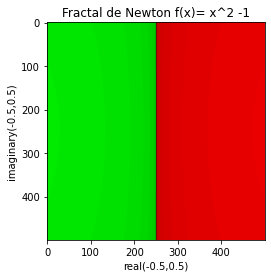

Z region from ( -1.0 , -1.0 ) to ( 1.0 , 1.0 )


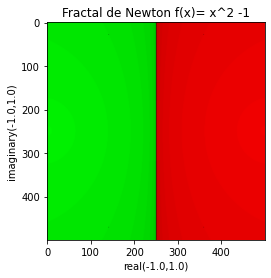

Z region from ( -1.5 , -1.5 ) to ( 1.5 , 1.5 )


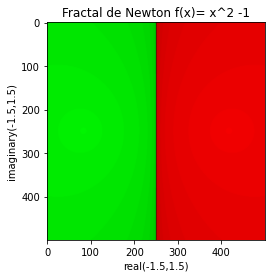

Z region from ( -2.0 , -2.0 ) to ( 2.0 , 2.0 )


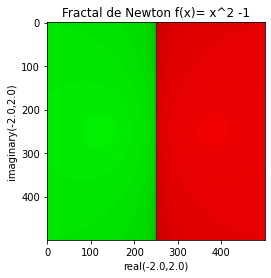

Z region from ( -2.5 , -2.5 ) to ( 2.5 , 2.5 )


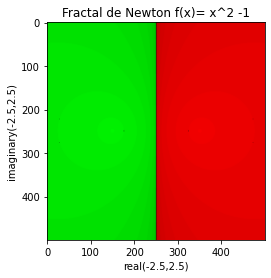

In [ ]:
print("zoom out")
display1(zoom=1,n=3)
display1(zoom=2,n=3)
display1(zoom=3,n=3)
display1(zoom=4,n=3)
display1(zoom=5,n=3)


Fractal de Newton para f(x)= x^2 + 1

zoom out
Z region from ( -0.5 , -0.5 ) to ( 0.5 , 0.5 )


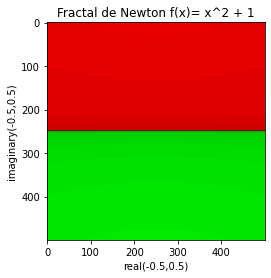

Z region from ( -1.0 , -1.0 ) to ( 1.0 , 1.0 )


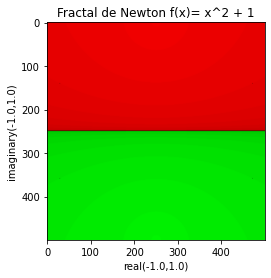

Z region from ( -1.5 , -1.5 ) to ( 1.5 , 1.5 )


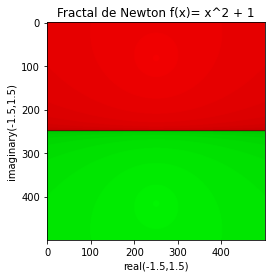

Z region from ( -2.0 , -2.0 ) to ( 2.0 , 2.0 )


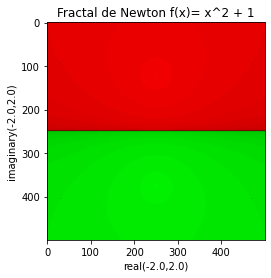

Z region from ( -2.5 , -2.5 ) to ( 2.5 , 2.5 )


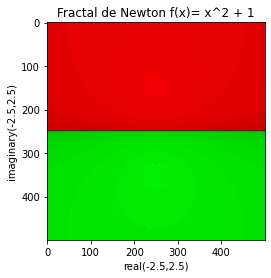

In [ ]:
print("zoom out")
display1(zoom=1,n=4)
display1(zoom=2,n=4)
display1(zoom=3,n=4)
display1(zoom=4,n=4)
display1(zoom=5,n=4)

PUNTO CUATRO

Puntos para f(x)= x^2

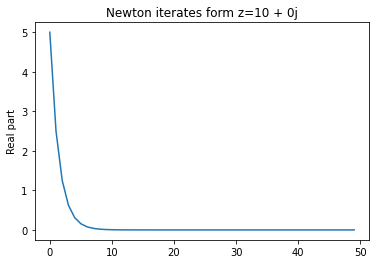

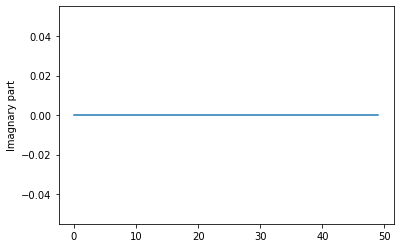

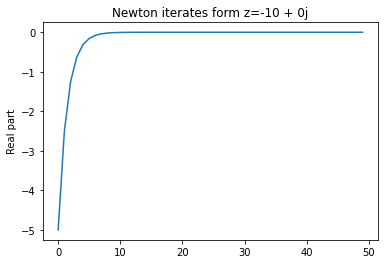

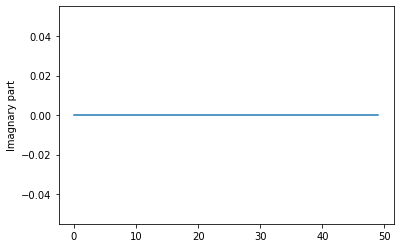

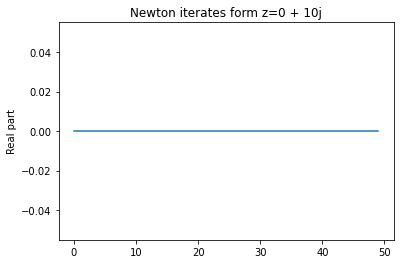

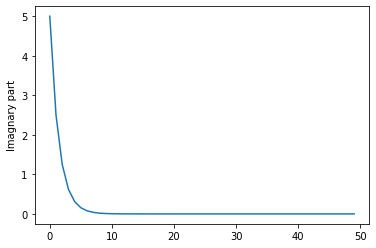

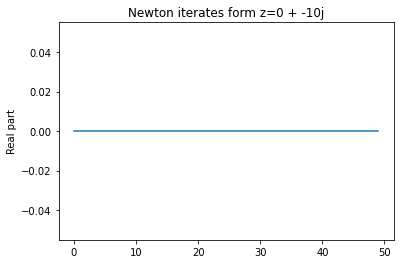

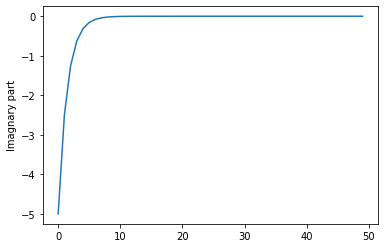

In [ ]:
graficar(10,0,1)
graficar(-10,0,1)
graficar(0,10,1)
graficar(0,-10,1)

Puntos para f(x)= (x-1)^2

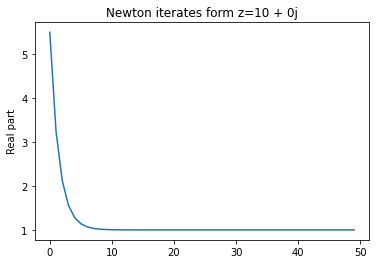

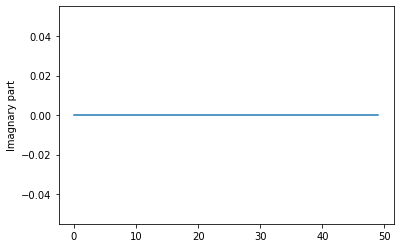

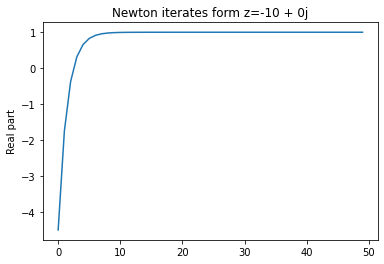

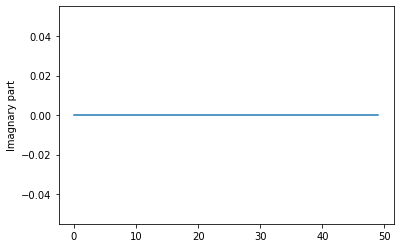

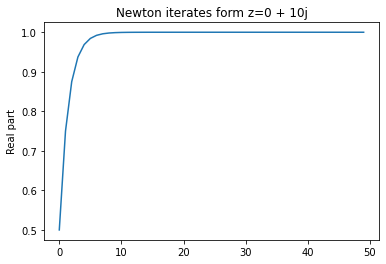

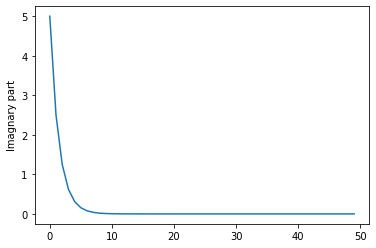

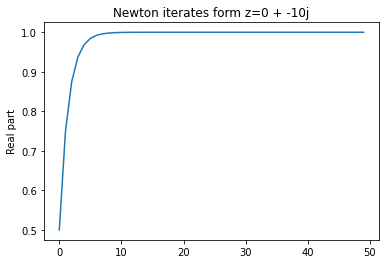

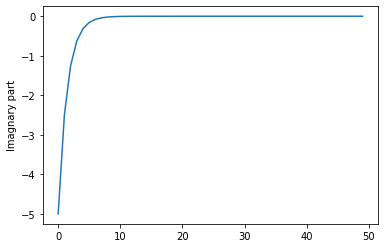

In [ ]:
graficar(10,0,2)
graficar(-10,0,2)
graficar(0,10,2)
graficar(0,-10,2)

Puntos para f(x)= x^2 -1

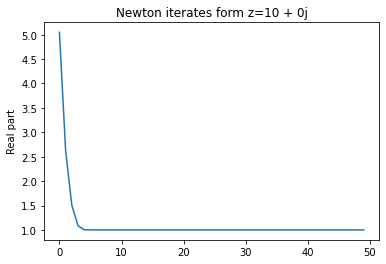

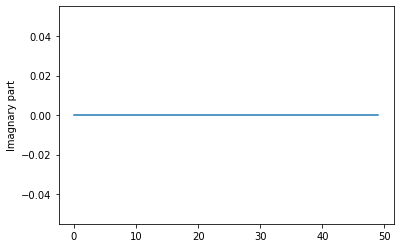

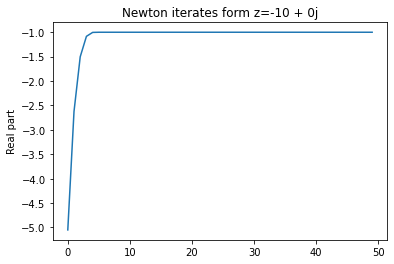

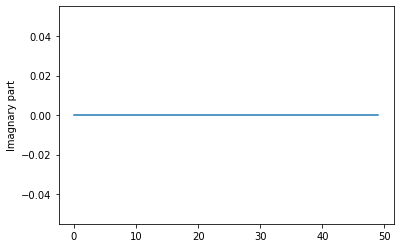

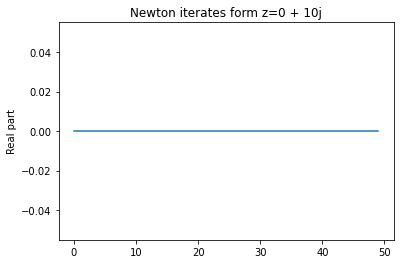

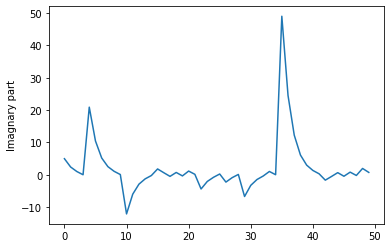

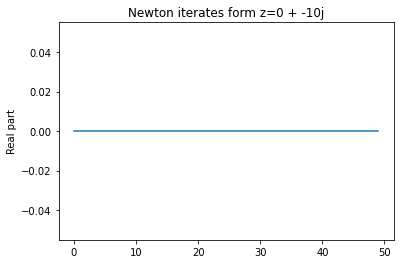

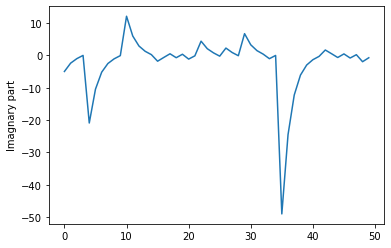

In [ ]:
graficar(10,0,3)
graficar(-10,0,3)
graficar(0,10,3)
graficar(0,-10,3)

Puntos para f(x)= x^2 +1

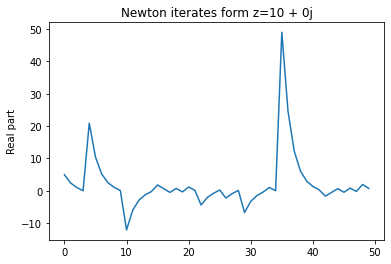

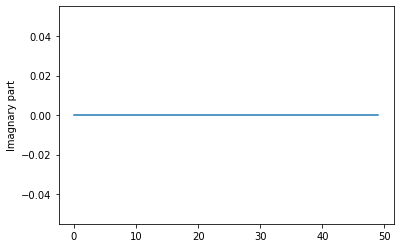

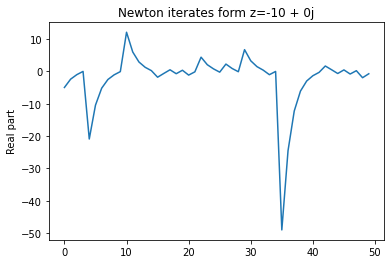

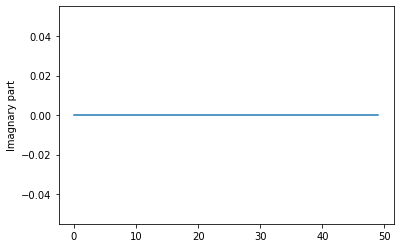

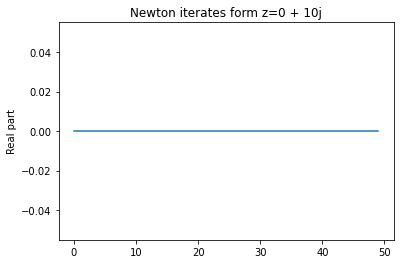

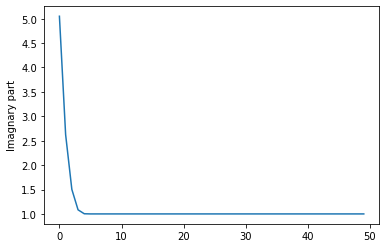

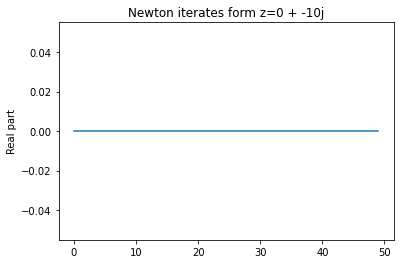

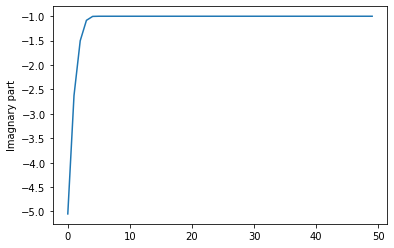

In [ ]:
graficar(10,0,4)
graficar(-10,0,4)
graficar(0,10,4)
graficar(0,-10,4)

PUNTO CINCO

Puntos para f(x)= x^2 

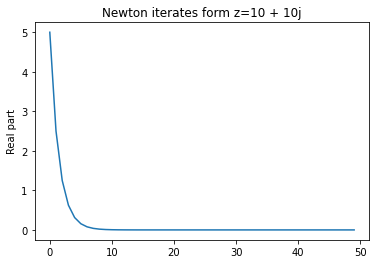

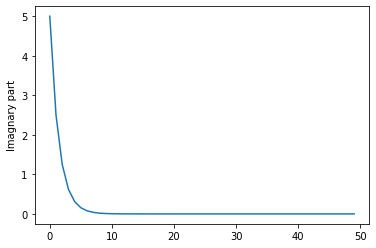

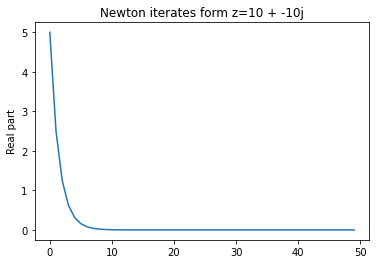

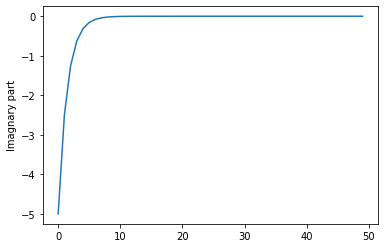

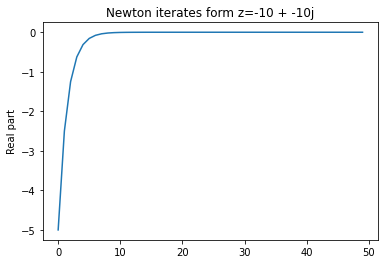

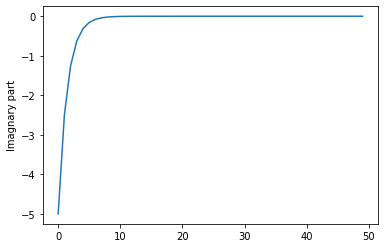

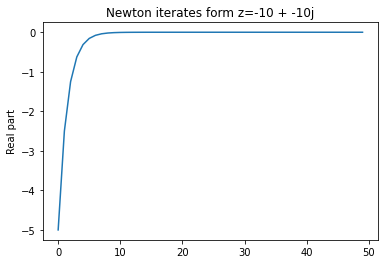

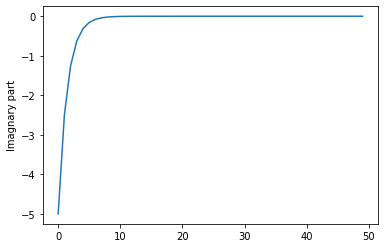

In [ ]:
graficar(10,10,1)
graficar(10,-10,1)
graficar(-10,-10,1)
graficar(-10,-10,1)

Puntos para f(x)= (x-1)^2 

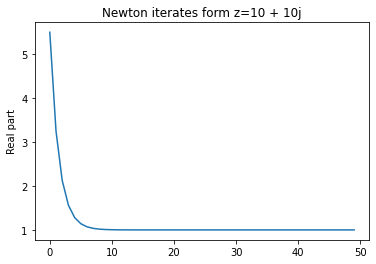

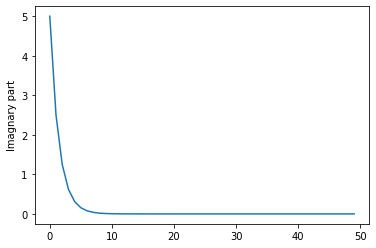

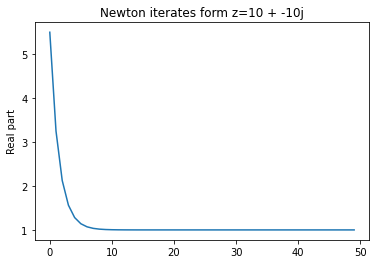

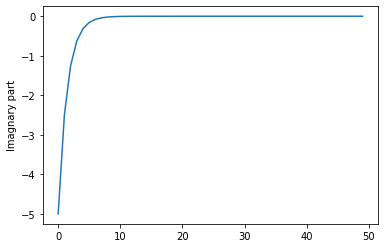

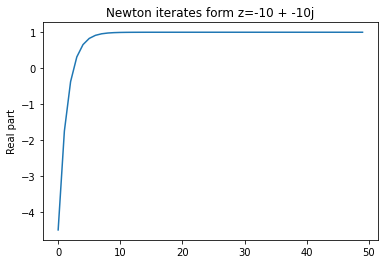

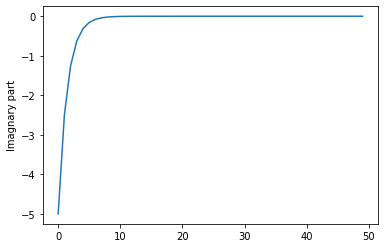

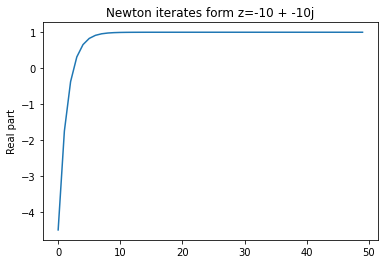

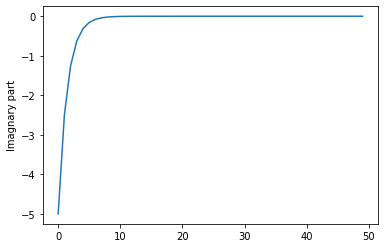

In [ ]:
graficar(10,10,2)
graficar(10,-10,2)
graficar(-10,-10,2)
graficar(-10,-10,2)

Puntos para f(x)= x^2 -1

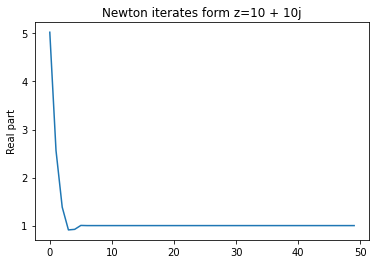

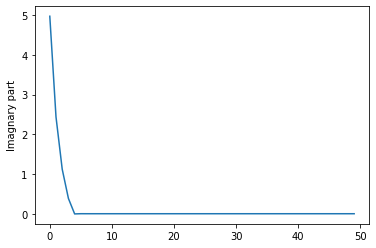

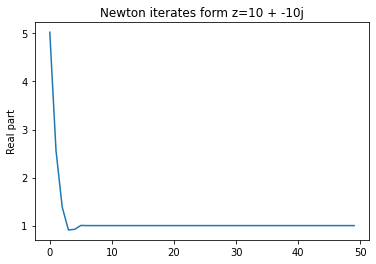

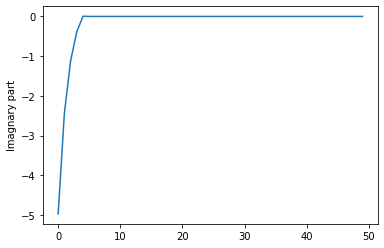

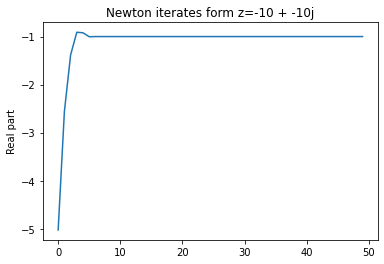

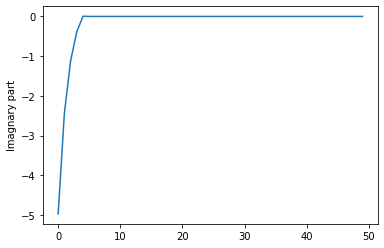

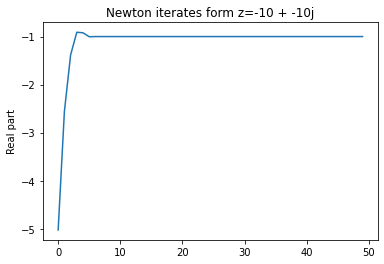

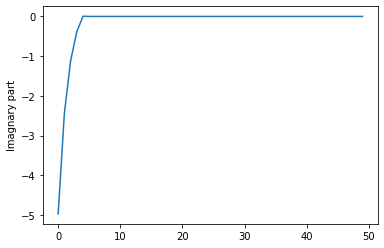

In [ ]:
graficar(10,10,3)
graficar(10,-10,3)
graficar(-10,-10,3)
graficar(-10,-10,3)

Puntos para f(x)= x^2 +1

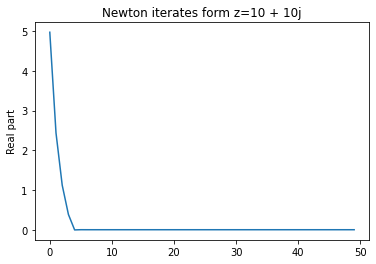

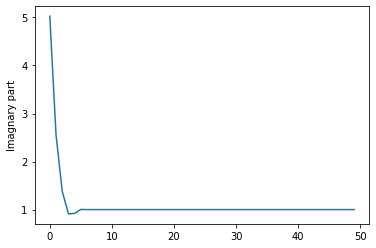

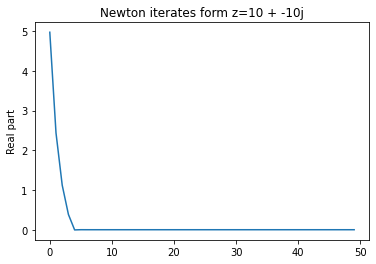

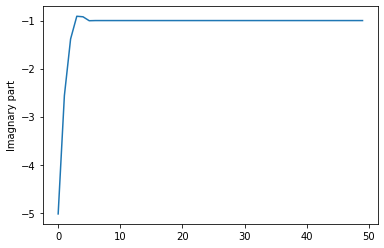

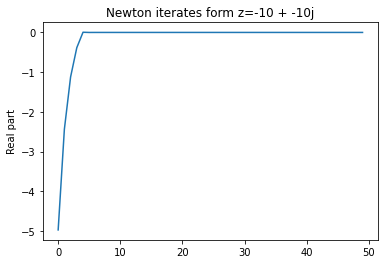

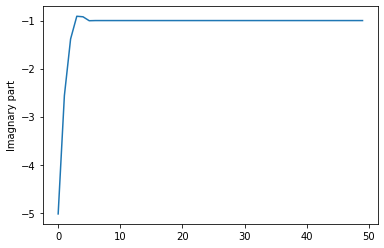

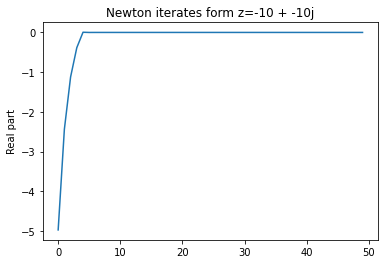

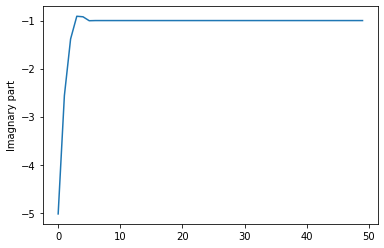

In [ ]:
graficar(10,10,4)
graficar(10,-10,4)
graficar(-10,-10,4)
graficar(-10,-10,4)